In [1]:
# Import
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt
from pandas import Index

In [2]:
# Load datasets
mm3 = pd.read_excel("../DANL470/Attempt_MM3.xlsx")
mm5 = pd.read_excel("../DANL470/Attempt_MM5.xlsx")

In [3]:
# Divide into categories and numerical
mm3_cat = mm3.select_dtypes(object)
mm5_cat = mm5.select_dtypes(object)

mm3_num = mm3.select_dtypes(np.number)
mm5_num = mm5.select_dtypes(np.number)

In [4]:
# Check for null values
mm3_cat.isnull().sum()

Maternal_age    0
dtype: int64

In [5]:
# Check for null values
mm5_cat.isnull().sum()

Demographic_variable    0
dtype: int64

In [6]:
# Replace categories with numerical values
mm3_cat = mm3_cat.apply(le.fit_transform)
mm5_cat = mm5_cat.apply(le.fit_transform)

In [7]:
# Check for null values
mm3_num.isna().sum()

All_races_maternal_deaths            0
All_races_number_of_live_births      0
All_races_maternal_mortality_rate    0
NH_White_maternal_deaths             0
NH_white_number_of_live_Births       0
NH_White_maternal_mortality_rate     0
NH_black_maternal_deaths             0
NH_Black_number_of_live_births       0
NH_Black_maternal_mortality_rate     0
Hispanic_maternal_deaths             0
Hispanic_number_of_live_births       0
Hispanic_maternal_mortality_rate     0
dtype: int64

In [8]:
# Check for null values
mm5_num.isna().sum()

Under_20_Maternal_age                    0
20_to_24_Maternal_age                    0
25_to_29_Maternal_age                    0
30_to_34_Maternal_age                    0
35_to_39_Maternal_age                    0
40_or_over_Maternal_age                  0
All_ages_Maternal_age                    0
Under_12_years_Maternal_education_1      0
12_years_Maternal_education_1            0
13_15_years_Maternal_education_1         0
16_or_more_years_Maternal_education_1    0
Married_Marital_status_2                 0
Unmarried_Marital_status_2               0
US_born                                  0
Foreign_born                             0
Metro_(urban)                            0
Non_Metro_(rural)                        0
Northeast                                0
Midwest                                  0
South                                    0
West                                     1
Infections                               1
HIV                                      6
Chronic_dis

In [9]:
# Replace null values with the mean of the columns
mm5_num.West.fillna(mm5_num.West.mean(), inplace=True)
mm5_num.Infections.fillna(mm5_num.Infections.mean(), inplace=True)
mm5_num.HIV.fillna(mm5_num.HIV.mean(), inplace=True)
mm5_num.Mental_disorders.fillna(mm5_num.Mental_disorders.mean(), inplace=True)

In [10]:
# Combine the datasets
mm3_final = pd.concat([mm3_cat,mm3_num], axis=1)
mm5_final = pd.concat([mm5_cat,mm5_num], axis=1)

In [11]:
maternal = pd.concat([mm3_final, mm5_final], axis=1)

In [12]:
maternal.isna().sum()

Maternal_age                             5
All_races_maternal_deaths                5
All_races_number_of_live_births          5
All_races_maternal_mortality_rate        5
NH_White_maternal_deaths                 5
NH_white_number_of_live_Births           5
NH_White_maternal_mortality_rate         5
NH_black_maternal_deaths                 5
NH_Black_number_of_live_births           5
NH_Black_maternal_mortality_rate         5
Hispanic_maternal_deaths                 5
Hispanic_number_of_live_births           5
Hispanic_maternal_mortality_rate         5
Demographic_variable                     0
Under_20_Maternal_age                    0
20_to_24_Maternal_age                    0
25_to_29_Maternal_age                    0
30_to_34_Maternal_age                    0
35_to_39_Maternal_age                    0
40_or_over_Maternal_age                  0
All_ages_Maternal_age                    0
Under_12_years_Maternal_education_1      0
12_years_Maternal_education_1            0
13_15_years

In [13]:
# Replace null values with mean of the columns
maternal.Maternal_age.fillna(maternal.Maternal_age.mean(), inplace=True)
maternal.All_races_maternal_deaths.fillna(maternal.All_races_maternal_deaths.mean(), inplace=True)
maternal.All_races_number_of_live_births.fillna(maternal.All_races_number_of_live_births.mean(), inplace=True)
maternal.All_races_maternal_mortality_rate.fillna(maternal.All_races_maternal_mortality_rate.mean(), inplace=True)
maternal.NH_White_maternal_deaths.fillna(maternal.NH_White_maternal_deaths.mean(), inplace=True)
maternal.NH_white_number_of_live_Births.fillna(maternal.NH_white_number_of_live_Births.mean(), inplace=True)
maternal.NH_White_maternal_mortality_rate.fillna(maternal.NH_White_maternal_mortality_rate.mean(), inplace=True)
maternal.NH_black_maternal_deaths.fillna(maternal.NH_black_maternal_deaths.mean(), inplace=True)
maternal.NH_Black_number_of_live_births.fillna(maternal.NH_Black_number_of_live_births.mean(), inplace=True)
maternal.NH_Black_maternal_mortality_rate.fillna(maternal.NH_Black_maternal_mortality_rate.mean(), inplace=True)
maternal.Hispanic_maternal_deaths.fillna(maternal.Hispanic_maternal_deaths.mean(), inplace=True)
maternal.Hispanic_number_of_live_births.fillna(maternal.Hispanic_number_of_live_births.mean(), inplace=True)
maternal.Hispanic_maternal_mortality_rate.fillna(maternal.Hispanic_maternal_mortality_rate.mean(), inplace=True)

Coefficients: [[-1.97669219e-06]]
Intercept: [41.60638789]
Root Mean Squared Error: 21.957894675603598
R^2 Score: -2.113386644262347


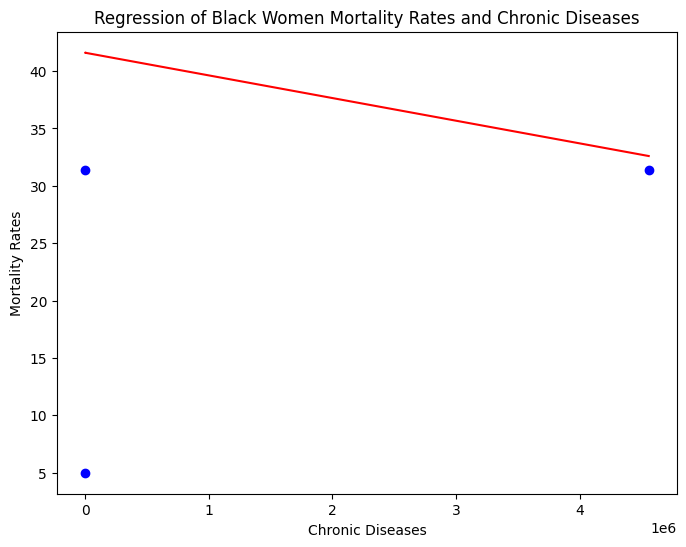

In [14]:
# Target/independent variable
x = maternal[['Chronic_diseases']]

# Target variable/dependent variable
y = maternal[['NH_Black_maternal_mortality_rate']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of Black Women Mortality Rates and Chronic Diseases')
plt.xlabel('Chronic Diseases')
plt.ylabel('Mortality Rates')
plt.show()

Coefficients: [[-1.97659815e-06]]
Intercept: [41.60582221]
Root Mean Squared Error: 21.958811365040404
R^2 Score: -2.113646602538463


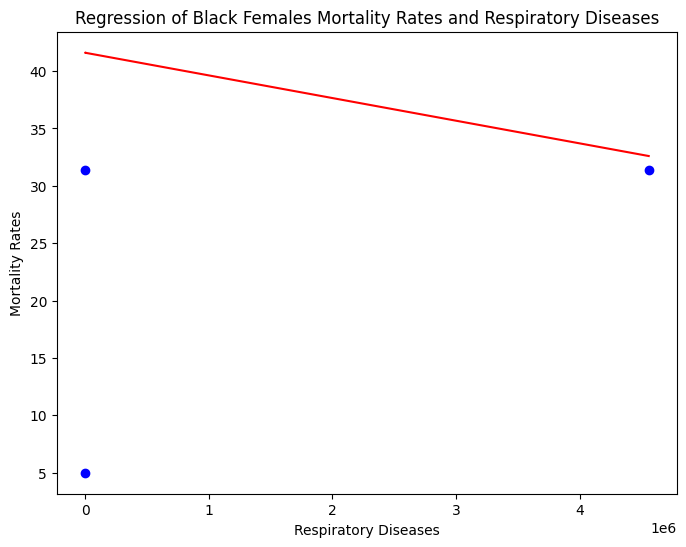

In [15]:
# Target/independent variable
x = maternal[['Respiratory_diseases']]

# Target variable/dependent variable
y = maternal[['NH_Black_maternal_mortality_rate']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of Black Females Mortality Rates and Respiratory Diseases')
plt.xlabel('Respiratory Diseases')
plt.ylabel('Mortality Rates')
plt.show()

Coefficients: [[-1.91056121e-05]]
Intercept: [479.13735504]
Root Mean Squared Error: 255.4884343496043
R^2 Score: -1.817955985013286


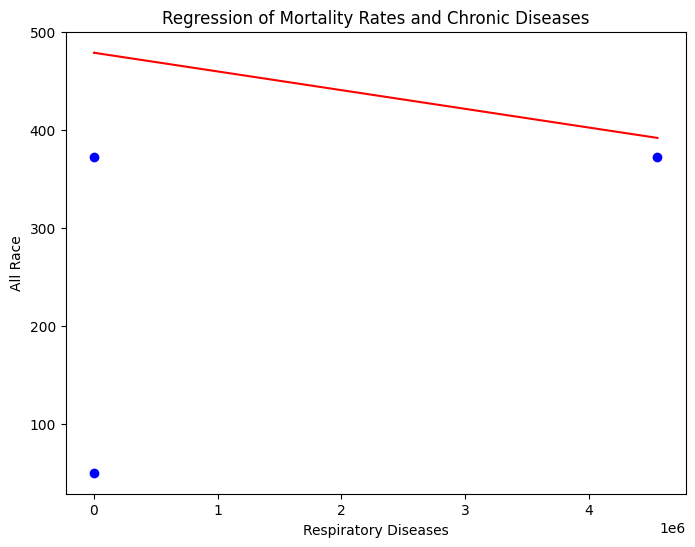

In [16]:
# Target/independent variable
x = maternal[['Respiratory_diseases']]

# Target variable/dependent variable
y = maternal[['All_races_maternal_deaths']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of Mortality Rates and Chronic Diseases')
plt.xlabel('Respiratory Diseases')
plt.ylabel('All Race')
plt.show()

Coefficients: [[0.80483208]]
Intercept: [108711.40557419]
Root Mean Squared Error: 840143.8298060655
R^2 Score: 0.41402235961807554


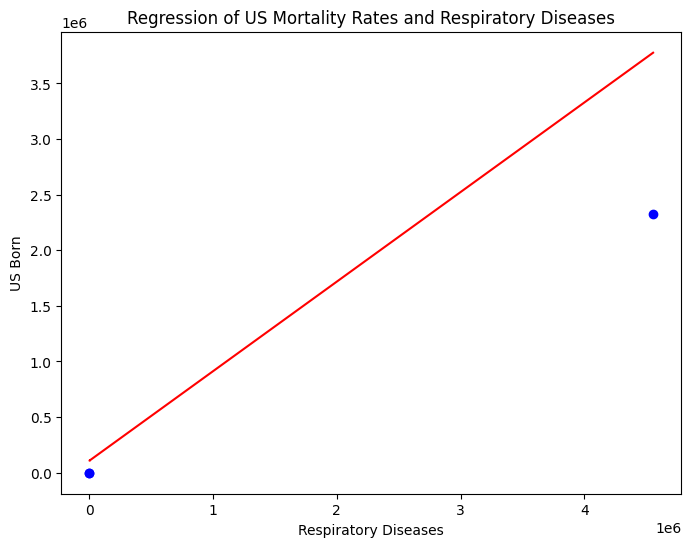

In [17]:
# Target/independent variable
x = maternal[['Respiratory_diseases']]

# Target variable/dependent variable
y = maternal[['US_born']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of US Mortality Rates and Respiratory Diseases')
plt.xlabel('Respiratory Diseases')
plt.ylabel('US Born')
plt.show()

Coefficients: [[0.19631688]]
Intercept: [-100794.13226487]
Root Mean Squared Error: 828923.5993736185
R^2 Score: 0.3738573588842945


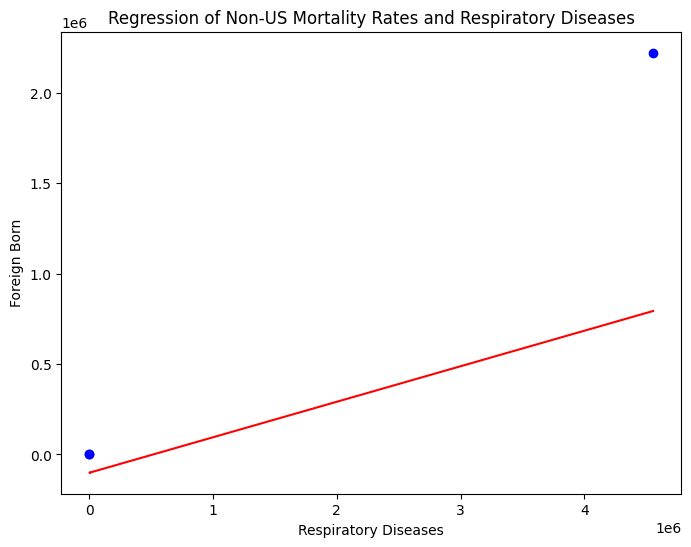

In [18]:
# Target/independent variable
x = maternal[['Respiratory_diseases']]

# Target variable/dependent variable
y = maternal[['Foreign_born']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of Non-US Mortality Rates and Respiratory Diseases')
plt.xlabel('Respiratory Diseases')
plt.ylabel('Foreign Born')
plt.show()

Coefficients: [[0.28068524]]
Intercept: [-10628.69877343]
Root Mean Squared Error: 138778.5778337589
R^2 Score: 0.9180296949169215


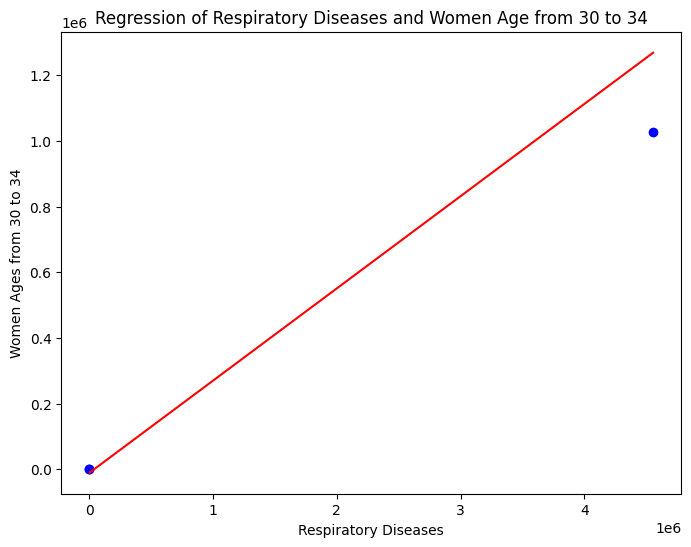

In [19]:
# Target/independent variable
x = maternal[['Respiratory_diseases']]

# Target variable/dependent variable
y = maternal[['30_to_34_Maternal_age']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of Respiratory Diseases and Women Age from 30 to 34')
plt.xlabel('Respiratory Diseases')
plt.ylabel('Women Ages from 30 to 34')
plt.show()

Coefficients: [[0.40241604 0.40241604]
 [0.09815844 0.09815844]]
Intercept: [ 108711.40557419 -100794.13226487]
Root Mean Squared Error: 834533.7145898421
R^2 Score: 0.3939398592511849


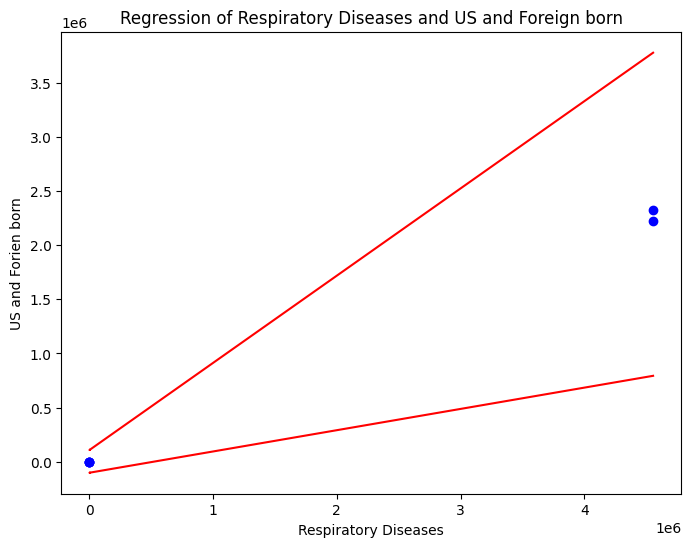

In [20]:
# Target/independent variable
x = maternal[['Respiratory_diseases', 'Respiratory_diseases']]

# Target variable/dependent variable
y = maternal[['US_born', 'Foreign_born']]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create linear regression object
regression_model = LinearRegression()

# Train the model using the training sets
regression_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regression_model.predict(x_test)

# Print coefficients and intercept
print('Coefficients:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)

# Print root mean squared error and R^2 score
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R^2 Score:', r2_score(y_test, y_pred))

# Set plot size
plt.rcParams['figure.figsize'] = [8, 6]

# Plot the data points and linear regression line
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.title('Regression of Respiratory Diseases and US and Foreign born')
plt.xlabel('Respiratory Diseases')
plt.ylabel('US and Forien born')
plt.show()

In [21]:
maternal.corr()

,Maternal_age,All_races_maternal_deaths,All_races_number_of_live_births,All_races_maternal_mortality_rate,NH_White_maternal_deaths,NH_white_number_of_live_Births,NH_White_maternal_mortality_rate,NH_black_maternal_deaths,NH_Black_number_of_live_births,NH_Black_maternal_mortality_rate,...,Northeast,Midwest,South,West,Infections,HIV,Chronic_diseases,Mental_disorders,CVD,Respiratory_diseases
Maternal_age,1.000000,0.385020,0.167287,0.229905,0.393376,0.160001,0.230110,0.370954,0.149675,0.215338,...,-0.545615,-0.516458,-0.557633,-0.500811,-0.559113,-0.633004,-0.551688,-0.559113,-0.551704,-0.551710
All_races_maternal_deaths,0.385020,1.000000,0.889972,0.120059,0.999117,0.886601,0.115482,0.999454,0.875224,0.119632,...,-0.291734,-0.294401,-0.287500,-0.131886,-0.293694,-0.284482,-0.289819,-0.293695,-0.289808,-0.289805
All_races_number_of_live_births,0.167287,0.889972,1.000000,-0.321924,0.870502,0.998636,-0.326034,0.898676,0.989763,-0.320836,...,-0.189567,-0.201807,-0.180670,-0.021950,-0.187829,-0.210655,-0.185349,-0.187830,-0.185344,-0.185343
All_races_maternal_mortality_rate,0.229905,0.120059,-0.321924,1.000000,0.159837,-0.321424,0.999902,0.107322,-0.329794,0.999317,...,-0.230577,-0.231190,-0.228112,-0.244628,-0.232544,-0.059510,-0.229485,-0.232544,-0.229470,-0.229465
NH_White_maternal_deaths,0.393376,0.999117,0.870502,0.159837,1.000000,0.866955,0.155253,0.997825,0.855793,0.159389,...,-0.293083,-0.294911,-0.289327,-0.135901,-0.295294,-0.283637,-0.291399,-0.295296,-0.291388,-0.291385
NH_white_number_of_live_Births,0.160001,0.886601,0.998636,-0.321424,0.866955,1.000000,-0.326107,0.895710,0.981330,-0.318636,...,-0.215155,-0.225286,-0.207256,-0.050630,-0.214262,-0.235382,-0.211432,-0.214263,-0.211426,-0.211425
NH_White_maternal_mortality_rate,0.230110,0.115482,-0.326034,0.999902,0.155253,-0.326107,1.000000,0.102783,-0.332145,0.998758,...,-0.227018,-0.228599,-0.224021,-0.240501,-0.228674,-0.053748,-0.225667,-0.228675,-0.225652,-0.225647
NH_black_maternal_deaths,0.370954,0.999454,0.898676,0.107322,0.997825,0.895710,0.102783,1.000000,0.883922,0.107048,...,-0.300433,-0.304406,-0.295356,-0.138530,-0.302099,-0.290183,-0.298114,-0.302101,-0.298103,-0.298100
NH_Black_number_of_live_births,0.149675,0.875224,0.989763,-0.329794,0.855793,0.981330,-0.332145,0.883922,1.000000,-0.333112,...,-0.112730,-0.133415,-0.099604,0.062553,-0.107853,-0.125652,-0.106431,-0.107854,-0.106427,-0.106426
NH_Black_maternal_mortality_rate,0.215338,0.119632,-0.320836,0.999317,0.159389,-0.318636,0.998758,0.107048,-0.333112,1.000000,...,-0.235143,-0.233830,-0.233763,-0.252113,-0.237704,-0.066901,-0.234578,-0.237704,-0.234562,-0.234557


In [22]:
# Run a multiple linear regression analysis
maternal <- lm(Y ~ X1 + X2 + X3, maternal=maternal)

# Print the model summary
summary(maternal)

# Plot the residuals
plot(maternal$residuals)

# Check for heteroscedasticity
plot(maternal$fitted.values, model$residuals)

# Check for multicollinearity
cor(maternal)

# Check for influential observations
influenceIndexPlot(model)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3905458735.py, line 2)

In [ ]:
# Print out the columns name
print(maternal.columns)

Index(['Maternal_age', 'All_races_maternal_deaths',
       'All_races_number_of_live_births', 'All_races_maternal_mortality_rate',
       'NH_White_maternal_deaths', 'NH_white_number_of_live_Births',
       'NH_White_maternal_mortality_rate', 'NH_black_maternal_deaths',
       'NH_Black_number_of_live_births', 'NH_Black_maternal_mortality_rate',
       'Hispanic_maternal_deaths', 'Hispanic_number_of_live_births',
       'Hispanic_maternal_mortality_rate', 'Demographic_variable',
       'Under_20_Maternal_age', '20_to_24_Maternal_age',
       '25_to_29_Maternal_age', '30_to_34_Maternal_age',
       '35_to_39_Maternal_age', '40_or_over_Maternal_age',
       'All_ages_Maternal_age', 'Under_12_years_Maternal_education_1',
       '12_years_Maternal_education_1', '13_15_years_Maternal_education_1',
       '16_or_more_years_Maternal_education_1', 'Married_Marital_status_2',
       'Unmarried_Marital_status_2', 'US_born', 'Foreign_born',
       'Metro_(urban)', 'Non_Metro_(rural)', 'Northeast'